In [1]:
import os 
import re
import shelve
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [16]:
resultsdir = './results/regional_income/'

r2_manf = []
r2_rettrd = []

mae_manf = []
mae_rettrd = []

for fn in os.listdir(resultsdir):
    # if os.path.isfile(fn):
    m_manf = re.search('results.*manf.*\.shelf',fn)
    if m_manf:
        
        shelf = shelve.open(resultsdir+fn, 'r')
        args_dict = shelf['args_dict']
        shelf.close()
        
        r2_manf.append(args_dict['full_metrics']['r2'])
        mae_manf.append(args_dict['scaled_test_metrics']['mae'])
    else:
        m_rettrd = re.search('results.*rettrd.*\.shelf',fn)
        if m_rettrd:

            shelf = shelve.open(resultsdir+fn, 'r')
            args_dict = shelf['args_dict']
            shelf.close()
            
            r2_rettrd.append(args_dict['full_metrics']['r2'])
            mae_rettrd.append(args_dict['scaled_test_metrics']['mae'])

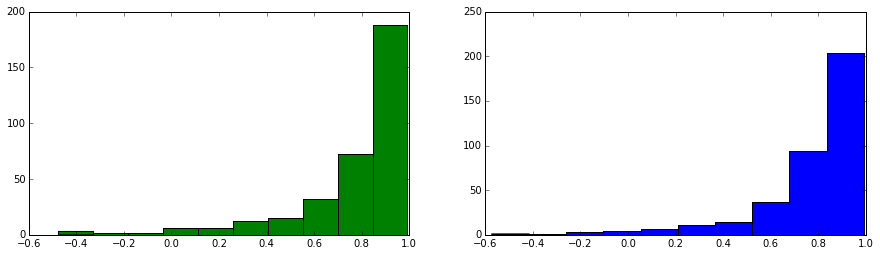

In [3]:
fig, ax = plt.subplots(1,2)
ax[0].hist(r2_manf, color='green')
ax[1].hist(r2_rettrd, color='blue')
fig.set_size_inches(15,4)
plt.show()

In [39]:
mae_manf = np.array(mae_manf)
mae_rettrd = np.array(mae_rettrd)

print len(mae_manf)
mae_manf_perc = mae_manf*100
print len(mae_manf_perc)

print ''

print mae_rettrd[:10]
mae_rettrd_perc = mae_rettrd*100
print mae_rettrd_perc[:10]

338
338

[  2.54789635e-04   2.13778961e-04   5.76637475e-04   1.83093695e-03
   1.53667374e-01   3.96252631e-04   5.01414207e-05   3.81396250e-04
   6.10485836e-03   2.33063787e-04]
[  2.54789635e-02   2.13778961e-02   5.76637475e-02   1.83093695e-01
   1.53667374e+01   3.96252631e-02   5.01414207e-03   3.81396250e-02
   6.10485836e-01   2.33063787e-02]


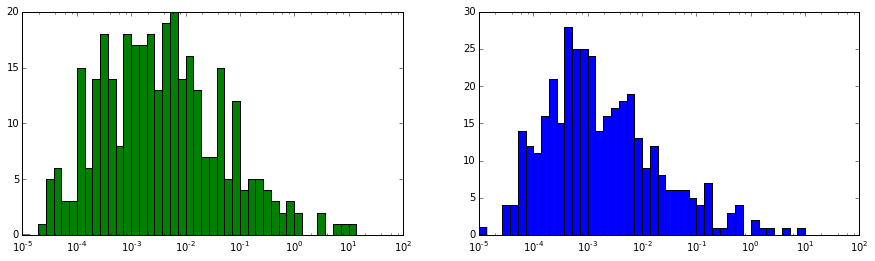

In [41]:
fig, ax = plt.subplots(1,2)
bins = [np.arange(0,10+.2,.2)]
ax[0].hist(mae_manf, color='green', bins=np.logspace(-5, 2, 50))
ax[0].set_xscale("log")
ax[1].hist(mae_rettrd, color='blue', bins=np.logspace(-5, 2, 50))
ax[1].set_xscale("log")
fig.set_size_inches(15,4)
plt.show()